In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
EXTRACTED_FEATURES_DB_NAME = '/data/experiments/YHE/extracted-features/extracted-features.sqlite'

In [3]:
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
sequences_df = pd.read_sql_query("select * from features", db_conn)
db_conn.close()

In [4]:
sequences_df.columns

Index(['sequence', 'charge', 'file_idx', 'peak_idx', 'target_coords',
       'theoretical_mz', 'q_value', 'delta_mz_ppm', 'delta_rt', 'delta_scan',
       'fwhm_rt_0', 'fwhm_scan_0', 'geometric_mean_0_1',
       'geometric_mean_0_1_2', 'isotope_0_1_mz_delta_ppm',
       'isotope_0_1_rt_delta', 'isotope_0_1_scan_delta',
       'isotope_0_2_mz_delta_ppm', 'isotope_0_2_rt_delta',
       'isotope_0_2_scan_delta', 'monoisotope_auc_over_isotope_peak_auc_sum',
       'monoisotope_int_over_isotope_peak_int_sum', 'mz_delta_ppm_std_dev_0',
       'mz_delta_ppm_std_dev_1', 'number_of_frames_0', 'number_of_frames_1',
       'number_of_frames_2', 'number_of_missing_frames_0',
       'number_of_missing_frames_1', 'number_of_missing_frames_2',
       'peak_base_width_rt_0', 'peak_base_width_scan_0', 'r_squared_phr',
       'rt_isotope_correlation', 'rt_isotope_cv', 'rt_peak_symmetry_0',
       'rt_peak_symmetry_1', 'rt_peak_symmetry_2', 'scan_isotope_correlation',
       'scan_isotope_cv', 'scan_peak

In [5]:
import matplotlib.pyplot as plt

f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = sequences_df.isotope_0_1_mz_delta_ppm
y, x, _ = ax1.hist(values, bins=bins)
# mean = np.mean(values)
# ax1.axvline(mean, color='darkorange', lw=1.0, ls='-.', label='mean')
# text_style = dict(size=10, color='brown', verticalalignment='center', horizontalalignment='left')
# ax1.text(mean*0.85, y.max()*0.98, "mean {}".format(round(mean,2)), **text_style, rotation='vertical')

plt.xlabel('isotope_0_1_mz_delta_ppm')
plt.ylabel('count')
# plt.title('pre-normalisation sequence intensity coefficient of variance across 1to1 runs, k={}\n({} unique sequences appearing in all runs)'.format(number_of_neighbours, len(sequence_cv_df)))
# plt.xlim((0,2))
# plt.ylim((0,600))

# plt.show()

Text(0, 0.5, 'count')

Text(0, 0.5, 'count')

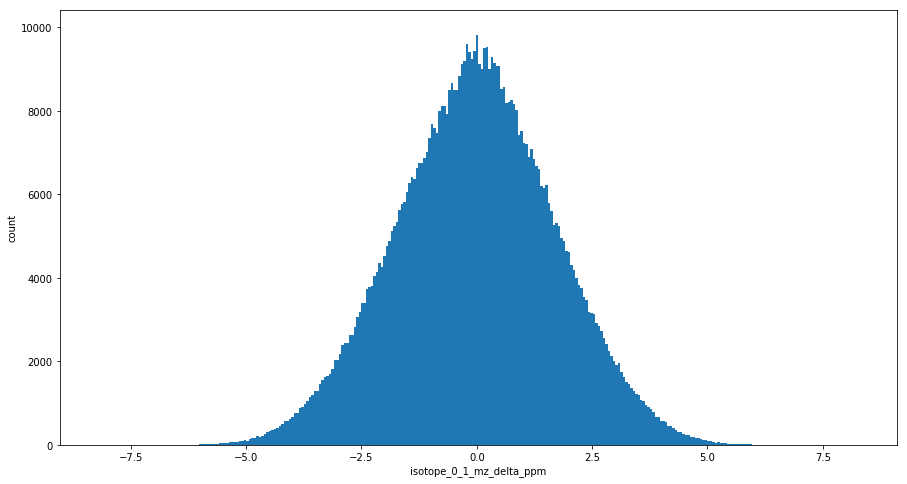

In [6]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

bins = 300
values = sequences_df.isotope_0_2_mz_delta_ppm
y, x, _ = ax1.hist(values, bins=bins)
# mean = np.mean(values)
# ax1.axvline(mean, color='darkorange', lw=1.0, ls='-.', label='mean')
# text_style = dict(size=10, color='brown', verticalalignment='center', horizontalalignment='left')
# ax1.text(mean*0.85, y.max()*0.98, "mean {}".format(round(mean,2)), **text_style, rotation='vertical')

plt.xlabel('isotope_0_1_mz_delta_ppm')
plt.ylabel('count')
# plt.title('pre-normalisation sequence intensity coefficient of variance across 1to1 runs, k={}\n({} unique sequences appearing in all runs)'.format(number_of_neighbours, len(sequence_cv_df)))
# plt.xlim((0,2))
# plt.ylim((0,600))

# plt.show()

In [7]:
sequences_df[['sequence','charge','run_name','number_of_runs_extracted','human','group','classed_as']].sample(n=5)

,sequence,charge,run_name,number_of_runs_extracted,human,group,classed_as
77974,GEQMNSAVLPEMENQVAVSSLSAVIK,3,YHE114_04_Slot1-1_1_3011,28,1,YHE114,decoy
274558,QNVQVFEFQLTSEEMK,2,YHE010_11_Slot1-1_1_3041,31,1,YHE010,target
634186,ISAYSALSHPYFQDLER,2,YHE211_05_Slot1-1_1_3001,31,1,YHE211,target
270579,LCLGHER,2,YHE010_11_Slot1-1_1_3041,31,1,YHE010,decoy
311184,FQMTQEVVCDECPNVK,2,YHE114_06_Slot1-1_1_3013,28,1,YHE114,decoy


In [8]:
sequences_df['group'] = sequences_df.run_name.apply(lambda x: x.split('_')[0])

In [9]:
sequences_df[['sequence','charge','run_name','number_of_runs_extracted','human','group']].sample(n=5)

,sequence,charge,run_name,number_of_runs_extracted,human,group
462702,WIDLTMEDIR,2,YHE211_10_Slot1-1_1_3006,31,1,YHE211
474572,MQQENMKPQEQLTLEPYER,2,YHE010_07_Slot1-1_1_2992,31,1,YHE010
150743,ILGSGISSSSVLHGMVFK,2,YHE211_09_Slot1-1_1_3005,31,1,YHE211
555176,DALLLLM[15.9949]ALSAGSPTVGR,2,YHE211_07_Slot1-1_1_3003,31,1,YHE211
173867,GQILMPNIGYGSNK,2,YHE114_07_Slot1-1_1_3014,29,1,YHE114


In [10]:
yhe_only_df = sequences_df[(sequences_df.group == 'YHE211') | (sequences_df.group == 'YHE114')]
yhe_only_targets_df = yhe_only_df[(yhe_only_df.classed_as == 'target')]

In [11]:
number_of_yhe_runs_in_experiment = len(yhe_only_df.file_idx.unique())
print('there are {} runs in the experiment'.format(number_of_yhe_runs_in_experiment))

there are 21 runs in the experiment


In [12]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in yhe_only_targets_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name, len(group_df), group_name[0], group_name[1]))
yhe_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence_charge','number_of_runs_extracted','sequence','charge'])

In [13]:
yhe_sequence_occurences_df.sample(n=10)

,sequence_charge,number_of_runs_extracted,sequence,charge
8530,"(HFLEAIENNK, 2)",2,HFLEAIENNK,2
6088,"(FFQGMPEKPTTTVR, 2)",20,FFQGMPEKPTTTVR,2
5937,"(FDLVYHNENGAEVVEYAVTQESK, 2)",1,FDLVYHNENGAEVVEYAVTQESK,2
11680,"(LGAEVDTNQYSVNDYR, 2)",19,LGAEVDTNQYSVNDYR,2
454,"(AFGYYGPLR, 2)",10,AFGYYGPLR,2
1828,"(AVSSAIAQLLGEVAQGNENYAGIAAR, 3)",21,AVSSAIAQLLGEVAQGNENYAGIAAR,3
6844,"(FWCQVIFDETLQK, 2)",4,FWCQVIFDETLQK,2
13152,"(LSNNAQNWGMQR, 2)",12,LSNNAQNWGMQR,2
5023,"(ELSENINAVTLMK, 2)",21,ELSENINAVTLMK,2
9059,"(HVVFGEVVDGYDIVK, 2)",15,HVVFGEVVDGYDIVK,2


In [14]:
df = yhe_only_df[(yhe_only_df.sequence == 'VTVLTHCNTGALATAGYGTALGVIR') & (yhe_only_df.charge == 2)][['sequence','charge','file_idx','classed_as']]
df

,sequence,charge,file_idx,classed_as
23682,VTVLTHCNTGALATAGYGTALGVIR,2,16,decoy
48379,VTVLTHCNTGALATAGYGTALGVIR,2,28,target
138789,VTVLTHCNTGALATAGYGTALGVIR,2,15,target
163771,VTVLTHCNTGALATAGYGTALGVIR,2,9,decoy
189035,VTVLTHCNTGALATAGYGTALGVIR,2,25,decoy
213961,VTVLTHCNTGALATAGYGTALGVIR,2,24,target
260385,VTVLTHCNTGALATAGYGTALGVIR,2,27,target
303223,VTVLTHCNTGALATAGYGTALGVIR,2,20,decoy
326406,VTVLTHCNTGALATAGYGTALGVIR,2,29,decoy
412469,VTVLTHCNTGALATAGYGTALGVIR,2,14,target


In [15]:
len(df)

19

In [16]:
# display the number of missing values across the experiment
print("there are {} unique extracted sequences.".format(len(yhe_only_df['sequence'].unique())))
yhe_sequence_occurences_df['missing_files'] = number_of_yhe_runs_in_experiment - yhe_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_values = yhe_sequence_occurences_df.missing_files.sum() / (len(yhe_sequence_occurences_df) * number_of_yhe_runs_in_experiment)
print("{}% of values are missing across the experiment.".format(round(proportion_of_missing_values*100)))

there are 27265 unique extracted sequences.
38.0% of values are missing across the experiment.


In [17]:
yhe_sequence_occurences_df.number_of_runs_extracted.max()

21

In [18]:
human_only_df = sequences_df[(sequences_df.group == 'YHE010')]

In [19]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in human_only_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name, len(group_df), group_name[0], group_name[1], group_df.iloc[0].human))
human_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence_charge','number_of_runs_extracted','sequence','charge','human'])


In [20]:
human_sequence_occurences_df.sample(n=10)

,sequence_charge,number_of_runs_extracted,sequence,charge,human
15096,"(MSNYDTDLFVPYFEAIQK, 2)",10,MSNYDTDLFVPYFEAIQK,2,1
20963,"(TGQAPGYSYTAANK, 2)",10,TGQAPGYSYTAANK,2,1
11744,"(LAGQWVEQEVEDRPEVK, 3)",10,LAGQWVEQEVEDRPEVK,3,1
12112,"(LDSSGVAFAVVGACQALGLR, 2)",3,LDSSGVAFAVVGACQALGLR,2,1
740,"(AHLAEIQLNGGSISEK, 2)",4,AHLAEIQLNGGSISEK,2,0
17301,"(QQNVNGAFAELR, 2)",10,QQNVNGAFAELR,2,1
2830,"(DFSHPQMPK, 2)",8,DFSHPQMPK,2,1
2211,"(CLTQSGIAGGYKPFNLETCR, 3)",7,CLTQSGIAGGYKPFNLETCR,3,1
19001,"(SEVIGDGNQIEIEIPPTR, 2)",10,SEVIGDGNQIEIEIPPTR,2,1
11529,"(KGEDEDKGPPCGPVNCNEK, 3)",6,KGEDEDKGPPCGPVNCNEK,3,1


In [21]:
len(human_sequence_occurences_df)

25309

In [22]:
# proportion of false positives i.e. non-human peptides found in the human-only runs
len(human_sequence_occurences_df[(human_sequence_occurences_df.human == 0)]) / len(human_sequence_occurences_df)

0.1297562132047888

In [23]:
number_of_human_runs_in_experiment = len(human_only_df.file_idx.unique())
print('there are {} human-only runs in the experiment'.format(number_of_human_runs_in_experiment))

there are 10 human-only runs in the experiment


In [24]:
# display the number of missing values across the experiment
print("there are {} unique extracted sequences.".format(len(human_only_df['sequence'].unique())))
human_sequence_occurences_df['missing_files'] = number_of_human_runs_in_experiment - human_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_values = human_sequence_occurences_df.missing_files.sum() / (len(human_sequence_occurences_df) * number_of_human_runs_in_experiment)
print("{}% of values are missing across the experiment.".format(round(proportion_of_missing_values*100)))

there are 23414 unique extracted sequences.
21.0% of values are missing across the experiment.
